In [15]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

from IPython.core.display import display, HTML
from IPython.display import Javascript, display
from ipywidgets import widgets

#Widen cells
#display(HTML("<style>.container { width:55% !important; }</style>"))

#Adding Buttons
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

#Execute all bellow button
di.display_html('''<h1>Connect Four | UML Diagram</h1>''', raw=True)
                                                                            #Function/Input/Output
di.display_html('''<form action="javascript:IPython.notebook.execute_cells([1,2,4,5]);">
<input type="submit" id="toggleButton" value="Start Processing"></form>''', raw=True)

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off 
the raw code.">
</form>''')

Connect Four | UML Diagram

In [16]:
import iplantuml

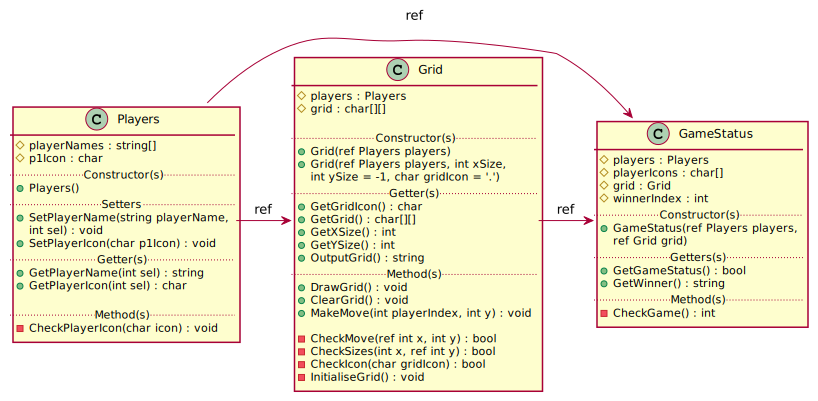

In [17]:
%%plantuml 

@startuml
    class Players 
    {
        # playerNames : string[]
        # p1Icon : char
        .. Constructor(s) ..
        + Players()
        .. Setters ..
        + SetPlayerName(string playerName, 
                        int sel) : void
        + SetPlayerIcon(char p1Icon) : void
        .. Getter(s) ..
        + GetPlayerName(int sel) : string
        + GetPlayerIcon(int sel) : char
        
        .. Method(s) ..
        - CheckPlayerIcon(char icon) : void
    }
         
    class Grid
    {
        # players : Players
        # grid : char[][]
        
        .. Constructor(s) ..
        + Grid(ref Players players)
        + Grid(ref Players players, int xSize, 
               int ySize = -1, char gridIcon = '.')
        .. Getter(s) ..
        + GetGridIcon() : char
        + GetGrid() : char[][]
        + GetXSize() : int
        + GetYSize() : int
        + OutputGrid() : string        
        .. Method(s) ..
        + DrawGrid() : void
        + ClearGrid() : void
        + MakeMove(int playerIndex, int y) : void
        
        - CheckMove(ref int x, int y) : bool
        - CheckSizes(int x, ref int y) : bool
        - CheckIcon(char gridIcon) : bool
        - InitialiseGrid() : void
    }
    
    class GameStatus
    {
        # players : Players
        # playerIcons : char[]
        # grid : Grid
        # winnerIndex : int
        .. Constructor(s) ..
        + GameStatus(ref Players players, 
                     ref Grid grid)
        .. Getters(s) ..
        + GetGameStatus() : bool
        + GetWinner() : string
        .. Method(s) ..
        - CheckGame() : int
    }
    
    Players -> Grid : ref
    Players -> GameStatus : ref
    Grid -> GameStatus : ref

@enduml

# CRC Layout
class ClassName
{
    Responsibilities : Collaborators
}

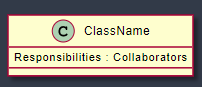

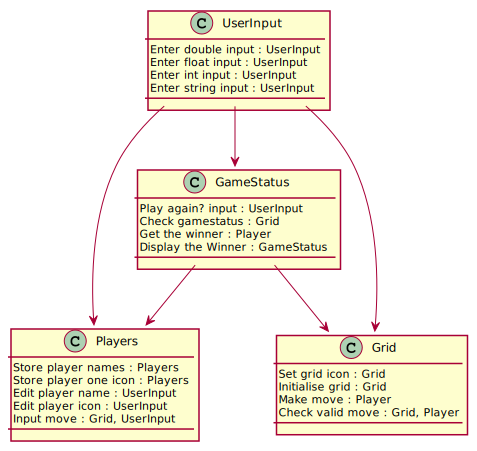

In [18]:
%%plantuml 

@startuml
    
    class UserInput
    {
        Enter double input : UserInput
        Enter float input : UserInput
        Enter int input : UserInput
        Enter string input : UserInput
    }
    
    class Players
    {
        Store player names : Players
        Store player one icon : Players
        Edit player name : UserInput
        Edit player icon : UserInput
        Input move : Grid, UserInput
    }
  
    class Grid
    {
        Set grid icon : Grid
        Initialise grid : Grid
        Make move : Player
        Check valid move : Grid, Player
    }

    class GameStatus
    {
        Play again? input : UserInput
        Check gamestatus : Grid
        Get the winner : Player
        Display the Winner : GameStatus
    }
    
    UserInput --> Players
    UserInput --> Grid
    UserInput --> GameStatus
    
    GameStatus --> Grid
    GameStatus --> Players
@enduml

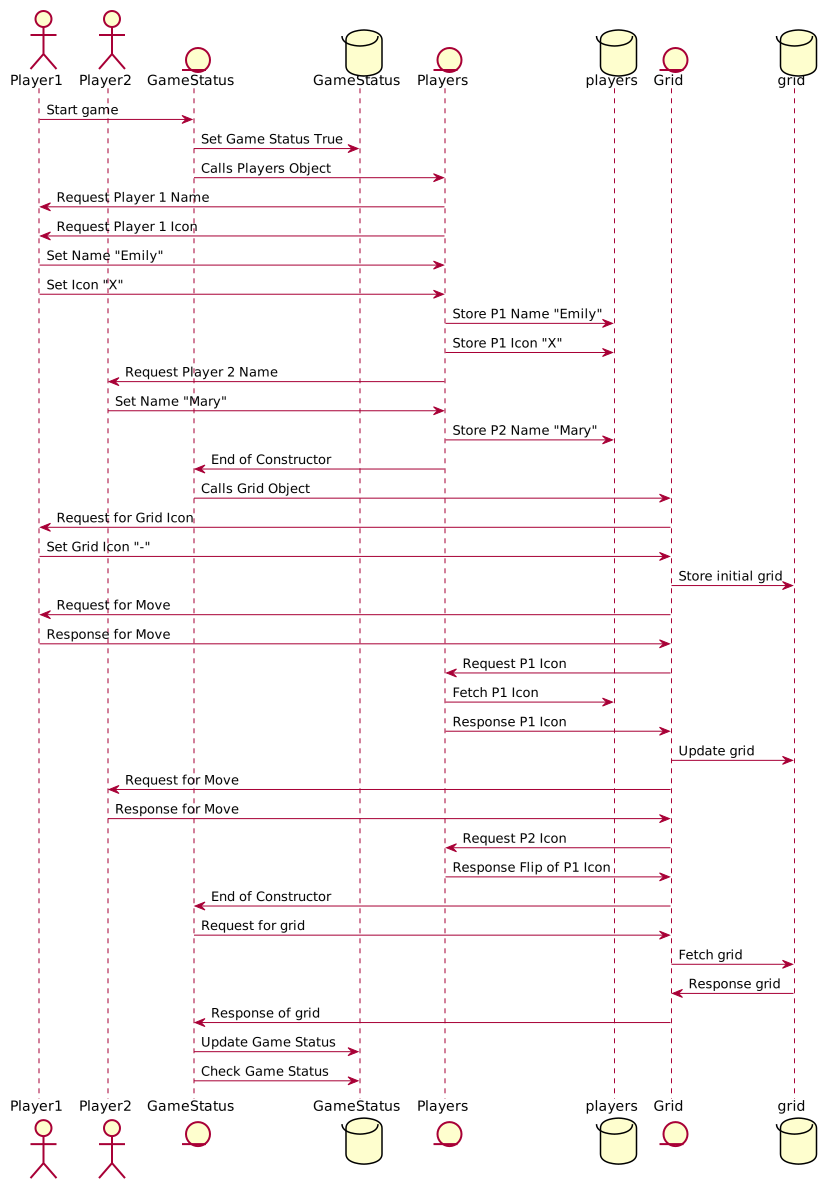

In [19]:
%%plantuml

@startuml
    actor Player1 as P1
    actor Player2 as P2
    
    entity GameStatus as GS
    database GameStatus as dbGS
    
    entity Players as Players
    database players as dbP
    
    entity Grid as Grid
    database grid as dbGrid
    
    P1 -> GS : Start game
    
    GS -> dbGS: Set Game Status True
    GS -> Players : Calls Players Object
    
    Players -> P1 : Request Player 1 Name
    Players -> P1 : Request Player 1 Icon
    P1 -> Players : Set Name "Emily"
    P1-> Players : Set Icon "X"
    
    Players -> dbP : Store P1 Name "Emily"
    Players -> dbP : Store P1 Icon "X"
        
    Players -> P2: Request Player 2 Name
    P2-> Players : Set Name "Mary"
    
    Players -> dbP : Store P2 Name "Mary"

    Players -> GS : End of Constructor
        
    GS -> Grid : Calls Grid Object
       Grid -> P1 : Request for Grid Icon
       P1 -> Grid : Set Grid Icon "-"
       Grid -> dbGrid : Store initial grid
        
       Grid -> P1 : Request for Move
       P1 -> Grid : Response for Move
       Grid -> Players : Request P1 Icon
       Players -> dbP : Fetch P1 Icon
       Players -> Grid : Response P1 Icon
        
       Grid -> dbGrid : Update grid
        
       Grid -> P2 : Request for Move
       P2 -> Grid : Response for Move
       Grid -> Players : Request P2 Icon
       Players -> Grid : Response Flip of P1 Icon
    Grid -> GS : End of Constructor
        
    GS -> Grid : Request for grid
    Grid -> dbGrid : Fetch grid
    dbGrid -> Grid : Response grid
    Grid -> GS : Response of grid
    GS -> dbGS : Update Game Status
    GS -> dbGS : Check Game Status
@enduml

# User Sequence Diagram

User as Actor